In [1]:
# In this notebook:

# I compare characteristics of DC and Marvel comic heroes and visualize them 

In [2]:
data_url = 'https://www.kaggle.com/fivethirtyeight/fivethirtyeight-comic-characters-dataset#dc-wikia-data.csv'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
%matplotlib inline

In [4]:
morig = pd.read_csv('marvel-wikia-data.csv',header=0,index_col=None)
dorig = pd.read_csv('dc-wikia-data.csv',header=0,index_col=None)
print(f'Marvel dataset shape is: {morig.shape}')
print(f'DC dataset shape is: {dorig.shape}')

dorig.head(3)

Marvel dataset shape is: (16376, 13)
DC dataset shape is: (6896, 13)


,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0


In [5]:
morig.rename(str.lower, axis='columns', inplace=True)
dorig.rename(str.lower, axis='columns', inplace=True)

morig['pub'] = 'Marvel'
dorig['pub'] = 'DC'

borig = pd.concat([morig, dorig], sort=False)
print(f'Combined dataset shape is {borig.shape}')

borig.head(3)

Combined dataset shape is (23272, 14)


,page_id,name,urlslug,id,align,eye,hair,sex,gsm,alive,appearances,first appearance,year,pub
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0,Marvel
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0,Marvel
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0,Marvel


## Cleanup data

In [6]:
from datetime import datetime

def conv_datetime(x):
    return datetime.strptime(str(int(float(x))), '%Y')

borig.dropna(subset=['year'], inplace=True)
borig['dt_year'] = borig['year'].apply(conv_datetime)
borig.sort_values(['dt_year'], ascending=True, inplace=True)

borig.head(3)

,page_id,name,urlslug,id,align,eye,hair,sex,gsm,alive,appearances,first appearance,year,pub,dt_year
231,1702,Richard Occult (New Earth),\/wiki\/Richard_Occult_(New_Earth),Secret Identity,NaN,Grey Eyes,Black Hair,Male Characters,NaN,Living Characters,125.0,"1935, October",1935.0,DC,1935-01-01
6886,289378,Bedivere (New Earth),\/wiki\/Bedivere_(New_Earth),NaN,NaN,NaN,NaN,Male Characters,NaN,Living Characters,NaN,"1936, February",1936.0,DC,1936-01-01
567,11333,Franklin Delano Roosevelt (New Earth),\/wiki\/Franklin_Delano_Roosevelt_(New_Earth),Public Identity,Good Characters,NaN,Grey Hair,Male Characters,NaN,Living Characters,52.0,"1936, March",1936.0,DC,1936-01-01


In [7]:
borig.drop(['page_id','urlslug','year'], axis=1, inplace=True)

borig.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22388 entries, 231 to 15014
Data columns (total 12 columns):
name                22388 non-null object
id                  16801 non-null object
align               19123 non-null object
eye                 9464 non-null object
hair                16142 non-null object
sex                 21469 non-null object
gsm                 148 non-null object
alive               22385 non-null object
appearances         21146 non-null float64
first appearance    22388 non-null object
pub                 22388 non-null object
dt_year             22388 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 2.2+ MB


In [8]:
# we see a clear dropoff in DC creation starting in 2011 
print(f"DC 2011 creation count: {borig[borig['dt_year'] == '2011-01-01']['pub'].value_counts()[1]}")
print(f"DC 2012 creation count: {borig[borig['dt_year'] == '2012-01-01']['pub'].value_counts()[1]}")
print(f"DC 2013 creation count: {borig[borig['dt_year'] == '2013-01-01']['pub'].value_counts()[1]}")

DC 2011 creation count: 155
DC 2012 creation count: 5
DC 2013 creation count: 1


In [9]:
# we see that DC 2011 creation data drops starting in October
borig[(borig['pub'] == 'DC') & (borig['dt_year'] == '2011-01-01')]['first appearance'].value_counts()

2011, January      25
2011, February     24
2011, May          18
2011, July         17
2011, August       16
2011, April        15
2011, September    13
2011, June         11
2011, March        10
2011, October       4
2011, November      2
Name: first appearance, dtype: int64

In [10]:
# remove post-2010 data to better compare DC & Marvel
borig = borig[borig['dt_year'] < '2011-01-01']

borig.tail(3)

,name,id,align,eye,hair,sex,gsm,alive,appearances,first appearance,pub,dt_year
8219,Gyre (Raptor) (Earth-616),No Dual Identity,Bad Characters,NaN,NaN,NaN,NaN,Living Characters,3.0,Jan-10,Marvel,2010-01-01
14753,Clovis Maines (Earth-616),NaN,Bad Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1.0,Jun-10,Marvel,2010-01-01
14754,Cody Twain (Earth-616),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1.0,Jun-10,Marvel,2010-01-01


In [11]:
col_list = ['id','align','sex','gsm','alive']

for col in col_list:
    print(f'Column {col}: {borig[col].unique()}')

Column id: ['Secret Identity' nan 'Public Identity' 'No Dual Identity'
 'Known to Authorities Identity' 'Identity Unknown']
Column align: [nan 'Good Characters' 'Neutral Characters' 'Bad Characters'
 'Reformed Criminals']
Column sex: ['Male Characters' 'Female Characters' nan 'Genderfluid Characters'
 'Genderless Characters' 'Agender Characters' 'Transgender Characters']
Column gsm: [nan 'Homosexual Characters' 'Bisexual Characters' 'Pansexual Characters'
 'Transvestites' 'Transgender Characters' 'Genderfluid Characters']
Column alive: ['Living Characters' 'Deceased Characters' nan]


In [12]:
borig['id'].fillna(value='Other Identity', inplace=True)
borig['id'].replace('Identity Unknown', 'Other Identity', inplace=True)
borig['align'].fillna(value='Other Align', inplace=True)
borig['align'].replace('Reformed Criminals', 'Other Align', inplace=True)
borig['sex'].fillna(value='Other Sex', inplace=True)
borig['sex'].replace('Genderless Characters', 'Agender Characters', inplace=True)
borig['gsm'].fillna(value='Other Gsm', inplace=True)
borig['gsm'].replace(['Transgender Characters','Genderfluid Characters',
                      'Pansexual Characters','Transvestites'],'Alt Characters',inplace=True)
borig.dropna(subset=['alive'], inplace=True)

In [13]:
borig.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21507 entries, 231 to 14754
Data columns (total 12 columns):
name                21507 non-null object
id                  21507 non-null object
align               21507 non-null object
eye                 8965 non-null object
hair                15477 non-null object
sex                 21507 non-null object
gsm                 21507 non-null object
alive               21507 non-null object
appearances         20320 non-null float64
first appearance    21507 non-null object
pub                 21507 non-null object
dt_year             21507 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 2.1+ MB


## Visualization

In [14]:
from pandas import pivot_table

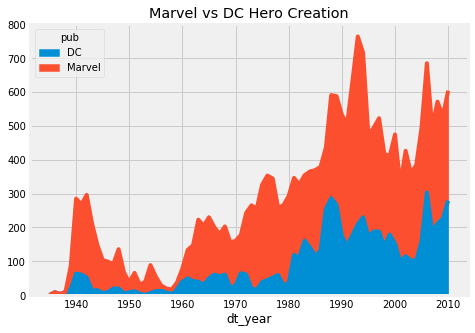

In [63]:
# we see that Marvel conistently creates more characters
pv_pub = pivot_table(borig,values='name',index=['dt_year'],columns=['pub'],aggfunc=len,fill_value=0)
pv_pub.plot(figsize=(7,5), kind='area', title='Marvel vs DC Hero Creation')

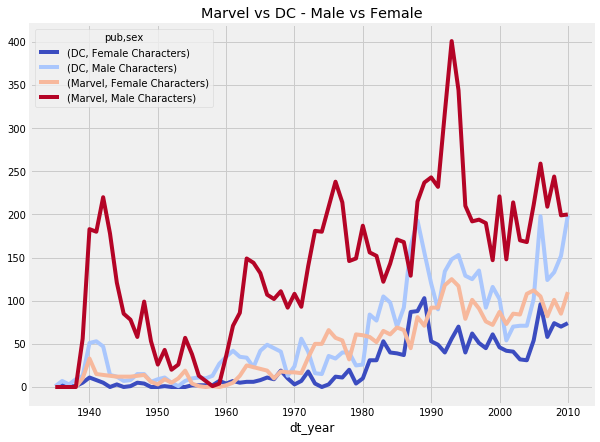

In [64]:
# we see that Marvel had a large gender gap in the beginnig, but is slowly closing it
pv_sex = pivot_table(borig,values='name',index=['dt_year'],columns=['pub','sex'],aggfunc=len,fill_value=0)
pv_sex.drop(['Agender Characters','Genderfluid Characters','Other Sex','Transgender Characters'],
             axis=1,level=1,inplace=True)
pv_sex.plot(figsize=(9,7), title='Marvel vs DC - Male vs Female',colormap='coolwarm')

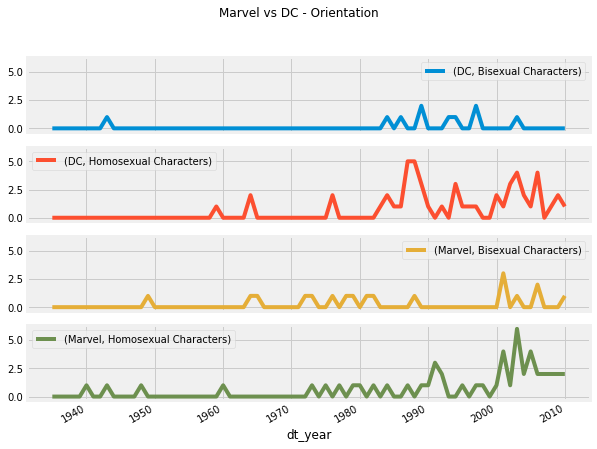

In [65]:
# we see more homosexual characters introduced in the late 1980's
# we see earlier adoption of homo & bi charcters in DC
pv_gsm = pivot_table(borig,values='name',index=['dt_year'],columns=['pub','gsm'],aggfunc=len,fill_value=0)
pv_gsm.drop(['Other Gsm','Alt Characters'],axis=1,level=1,inplace=True)

pv_gsm.plot(figsize=(9,7),title='Marvel vs DC - Orientation',subplots=True,sharey=True)
plt.show()

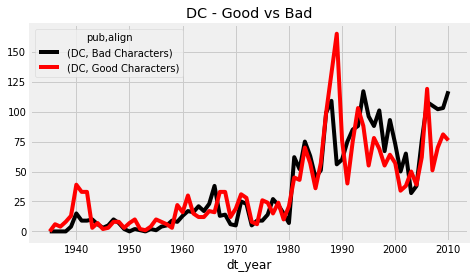

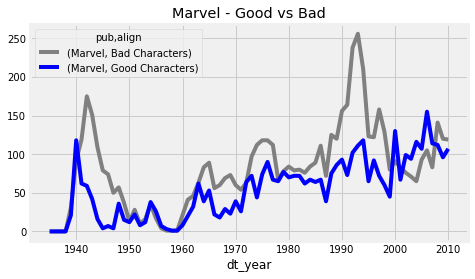

In [66]:
# we see equal good/bad introduction for DC, with sharper bad character intro duction for Marvel
pv_ali = pivot_table(borig,values='name',index=['dt_year'],columns=['pub','align'],aggfunc=len,fill_value=0)
pv_ali.drop(['Other Align','Neutral Characters'],axis=1,level=1,inplace=True)

pv_ali.iloc[:, :2].plot(figsize=(7,4), title='DC - Good vs Bad', color=['black','red'])
pv_ali.iloc[:, 2:].plot(figsize=(7,4), title='Marvel - Good vs Bad', color=['grey','blue'])
plt.show()

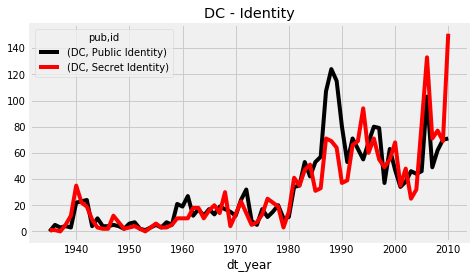

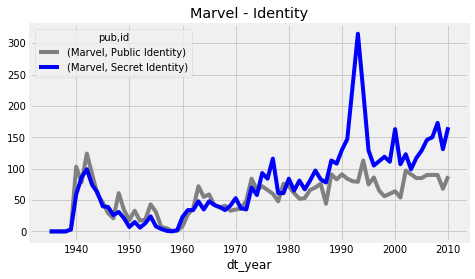

In [70]:
pv_id = pivot_table(borig,values='name',index=['dt_year'],columns=['pub','id'],aggfunc=len,fill_value=0)
pv_id.drop(['Other Identity','No Dual Identity','Known to Authorities Identity']
           ,axis=1,level=1,inplace=True)

pv_id.iloc[:, :2].plot(figsize=(7,4), title='DC - Identity', color=['black','red'])
pv_id.iloc[:, 2:].plot(figsize=(7,4), title='Marvel - Identity', color=['grey','blue'])
plt.show()

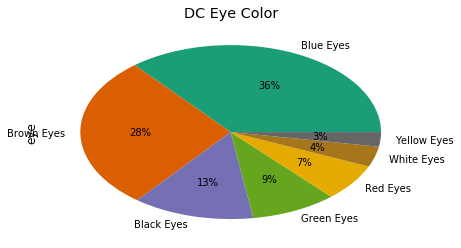

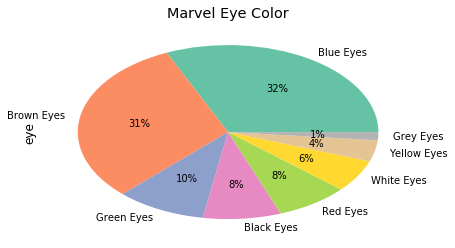

In [142]:
# we see similar breakdowns for eye color
eye_dc =  plt.figure(1)
eye_dc =  borig[borig['pub'] == 'DC']['eye'].value_counts()[:7].plot(kind='pie',
          autopct='%1.0f%%',title='DC Eye Color',colormap='Dark2')
eye_marvel = plt.figure(2)
eye_marvel = borig[borig['pub'] == 'Marvel']['eye'].value_counts()[:8].plot(kind='pie',
            autopct='%1.0f%%',title='Marvel Eye Color',colormap='Set2')
plt.show()

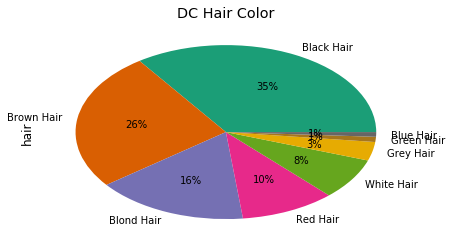

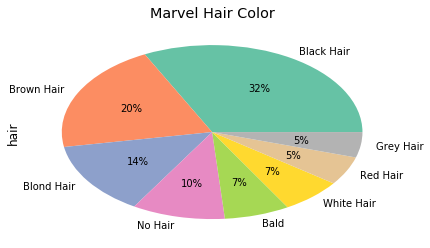

In [144]:
# we see similar top 3, but Marvel has No Hair/Bald for 4/5; DC likely coded No Hair/Bald as np.NaN
hair_dc =  plt.figure(1)
hair_dc =  borig[borig['pub'] == 'DC']['hair'].value_counts()[:8].plot(kind='pie',
          autopct='%1.0f%%',title='DC Hair Color',colormap='Dark2')
hair_marvel = plt.figure(2)
hair_marvel = borig[borig['pub'] == 'Marvel']['hair'].value_counts()[:8].plot(kind='pie',
            autopct='%1.0f%%',title='Marvel Hair Color',colormap='Set2')
plt.show()

In [152]:
borig.head(3)

,name,id,align,eye,hair,sex,gsm,alive,appearances,first appearance,pub,dt_year
231,Richard Occult (New Earth),Secret Identity,Other Align,Grey Eyes,Black Hair,Male Characters,Other Gsm,Living Characters,125.0,"1935, October",DC,1935-01-01
6886,Bedivere (New Earth),Other Identity,Other Align,NaN,NaN,Male Characters,Other Gsm,Living Characters,NaN,"1936, February",DC,1936-01-01
567,Franklin Delano Roosevelt (New Earth),Public Identity,Good Characters,NaN,Grey Hair,Male Characters,Other Gsm,Living Characters,52.0,"1936, March",DC,1936-01-01


In [151]:
# Additional analysis that can be done:
# Appearances analysis could be interesting,
# however the number of well-known charcters with np.NaN shows data is incomplete.
# Character creation by month can also extracted and analyzed

In [ ]:
# This concludes pt 02